In [5]:
url = 'https://en.wikipedia.org/wiki/Data_science'


In [10]:
pip install requests

  Using cached requests-2.30.0-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-3.1.0-cp311-cp311-macosx_10_9_x86_64.whl (123 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-featur

In [12]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations 
				Toggle Foundations subsection
			 1.1 Relationship to statistics 2 Etymology 
				Toggle Etymology subsection
			 2.1 Early usage 2.2 Modern usage 3 See also 4 References 
						Toggle the table of contents
					 Toggle the table of contents Data science 44 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français 한국어 Հայերեն हिन्दी Bahasa Indonesia Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Mela

In [13]:
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached pyrsistent-0.19.3-cp311-cp311-macosx_10_9_universal2.whl (82 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 6.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=9478dc2d8c0963d95877b5ea9a5f7c4f40145e6ebc53999a7c36f39f31568653
  Stored in directory: /Users/lavam/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [25]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data science', 3.912280701754386),
 ('information science', 3.912280701754386),
 ('computer science', 3.912280701754386),
 ('^ davenport', 3.8),
 ('data analysis', 3.666666666666667),
 ('science', 1.912280701754386),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('thomas', 1.2),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

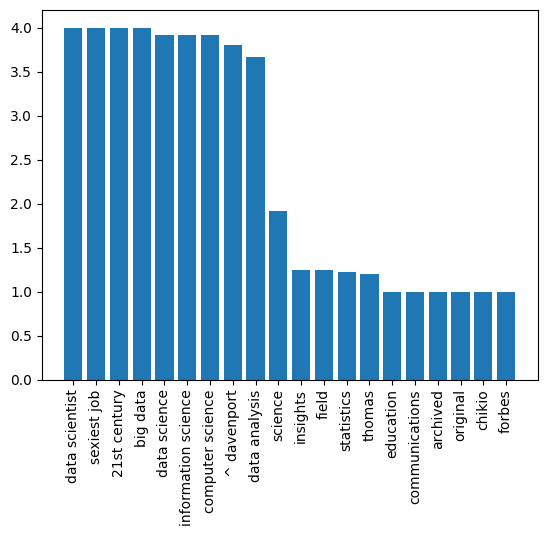

In [26]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [23]:
!{sys.executable} -m pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp311-cp311-macosx_10_14_x86_64.whl size=161456 sha256=0b0cc409026274225a6d8ad5f397a61904c86ac326c4fc8881898c3569f134fa
  Stored in directory: /Users/lavam/Library/Caches/pip/wheels/b7/14/d8/f10236cee8e25843111cceaa8aa6bbd35bfad15bdf576ed660
Successfully built wordcloud


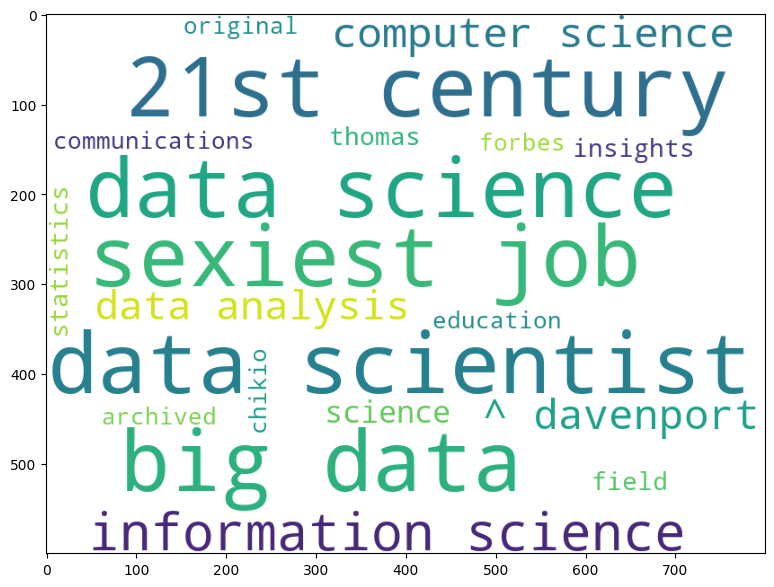

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

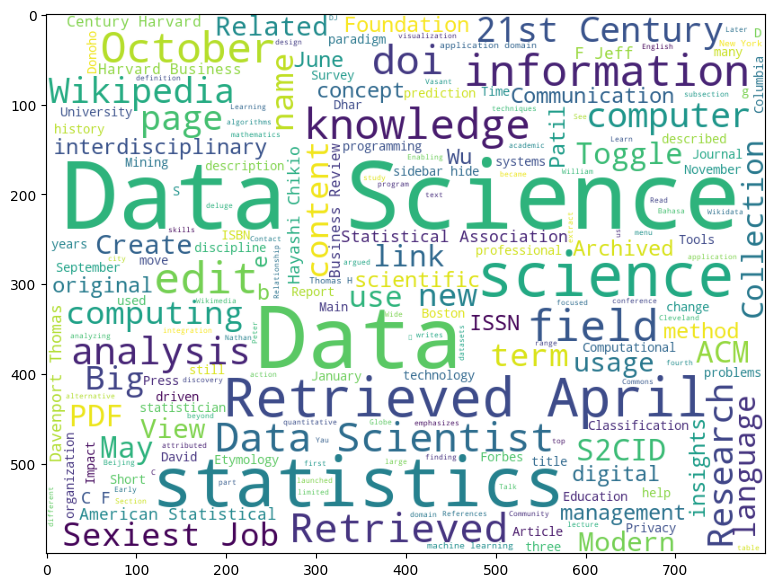

In [28]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [31]:
wc.generate(text).to_file('./ds_wordcloud.png')
